<font size=6> ch13 데이터 시각화 </font>

# 시각화 개요

- 시각화 라이브러리
 - matplotlib, seaborn, folium

# matplotlib

## 패키지 임포트 및 기본 설정

In [1]:
import matplotlib
import matplotlib.pyplot as plt

In [ ]:
#주피터 노트북이 실행되는 브라우저에서 시각화
# 그래프를 더 높은 해상도로 그려줌

In [2]:
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'

In [6]:
matplotlib.__version__

'3.3.2'

- 그래프를 그리기 위한 단계
    - 데이터 준비
    - 그래프 생성
    - 그래프 함수로 그리기
    - 그래프 커스터마이징
    - 그래프 출력 및 저장

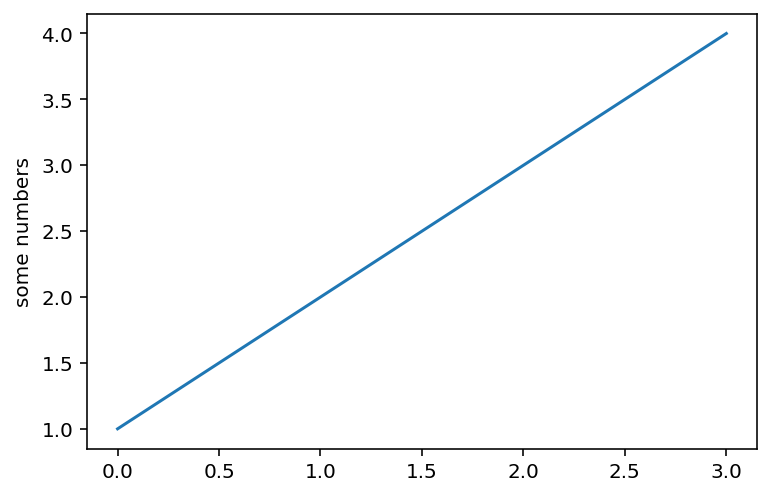

In [14]:
plt.plot([1,2,3,4])
plt.ylabel('some numbers')
plt.show()

## 그래프 객체

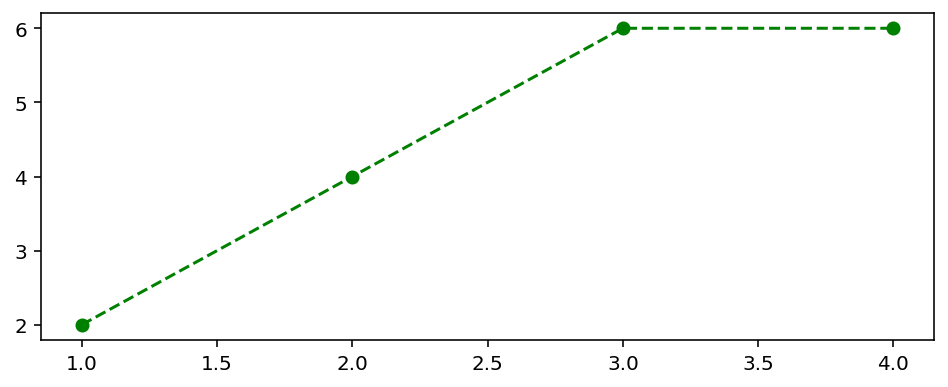

In [16]:
fig = plt.figure(figsize=(8,3)) #공간 생성
plt.plot([1,2,3,4],[2,4,6,6],'go--')

## 그래프 영역 나누기

### subplot()함수로 서브플롯 추가

In [17]:
x = np.arange(0,10,0.01)

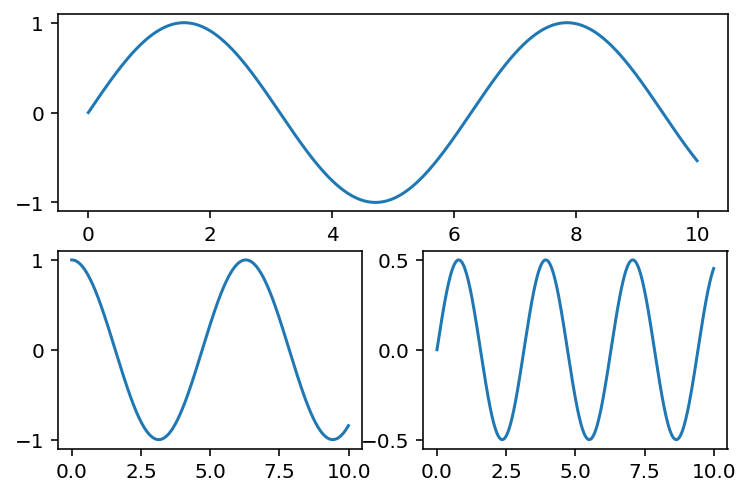

In [22]:
plt.subplot(2,1,1) #2행 1열 서브 플롯 생성 후 1번째 서브 플롯에 작성
plt.plot(x,np.sin(x))
plt.subplot(2,2,3)
plt.plot(x,np.cos(x))
plt.subplot(2,2,4)
plt.plot(x,np.sin(x)*np.cos(x))
plt.show()

In [ ]:
#경고 메세지 안 보이게
import warnings
warnings.filterwarnings(action='ignore')

### subplots() 함수로 서브 플롯 추가

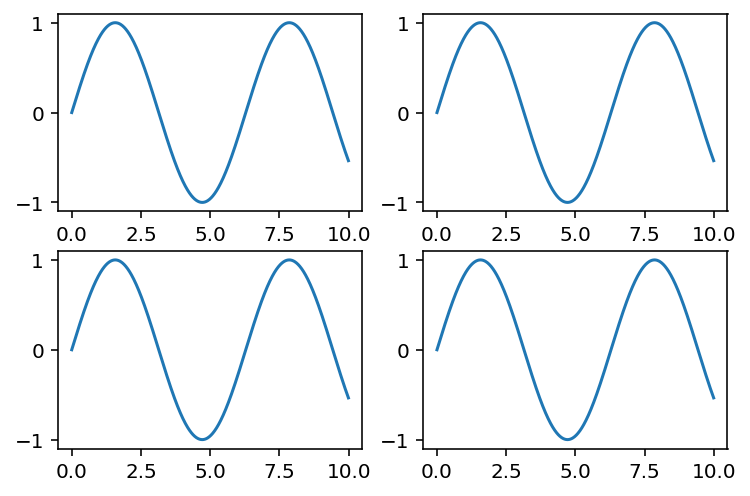

In [23]:
plt.subplot(2,2,1); plt.plot(x,np.sin(x))
plt.subplot(2,2,2); plt.plot(x,np.sin(x))
plt.subplot(2,2,3); plt.plot(x,np.sin(x))
plt.subplot(2,2,4); plt.plot(x,np.sin(x))

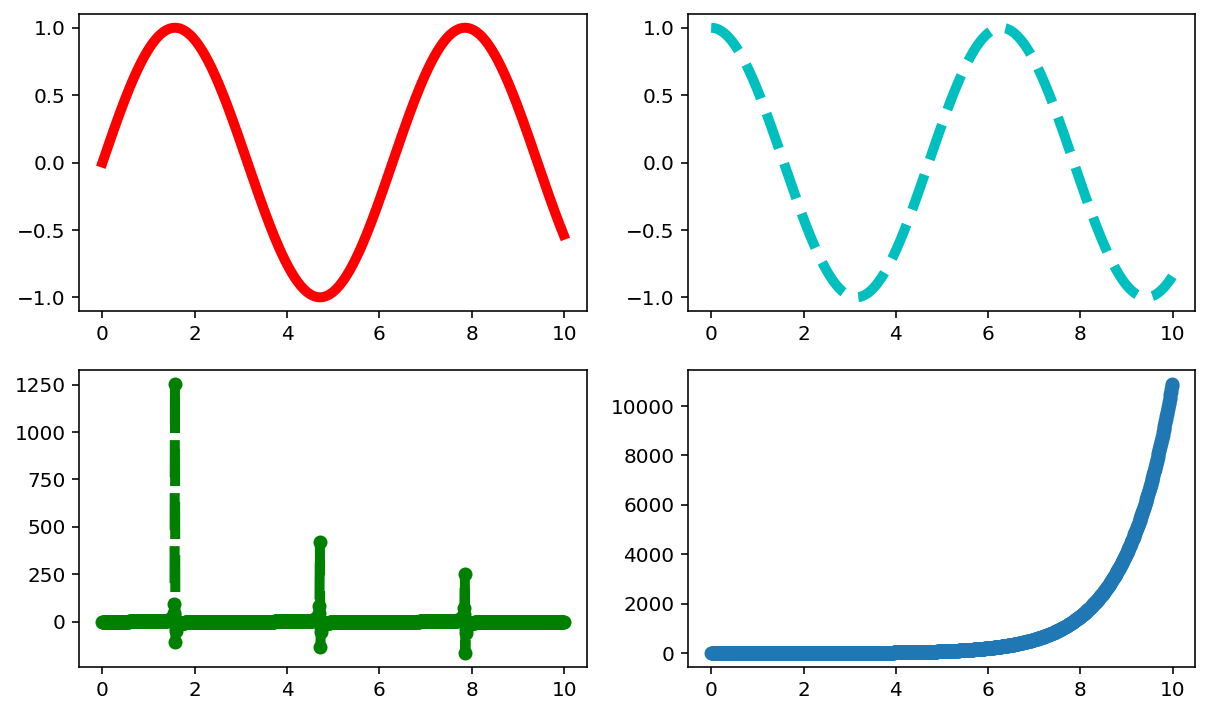

In [34]:
fig, axes = plt.subplots(2,2,figsize=(10,6))
axes[0,0].plot(x, np.sin(x), color='r', linewidth=5)
axes[0,1].plot(x, np.cos(x), 'c--', linewidth=5)
axes[1,0].plot(x, np.tan(x), 'go--', linewidth=5)
axes[1,1].plot(x, np.cosh(x), 'o--', linewidth=5)

In [35]:
x = np.arange(0,7,0.01)

In [36]:
def sin_cos(x):
    return np.sin(x)*np.cos(x)
func_list = [np.sin, np.cos, np.tanh, sin_cos]

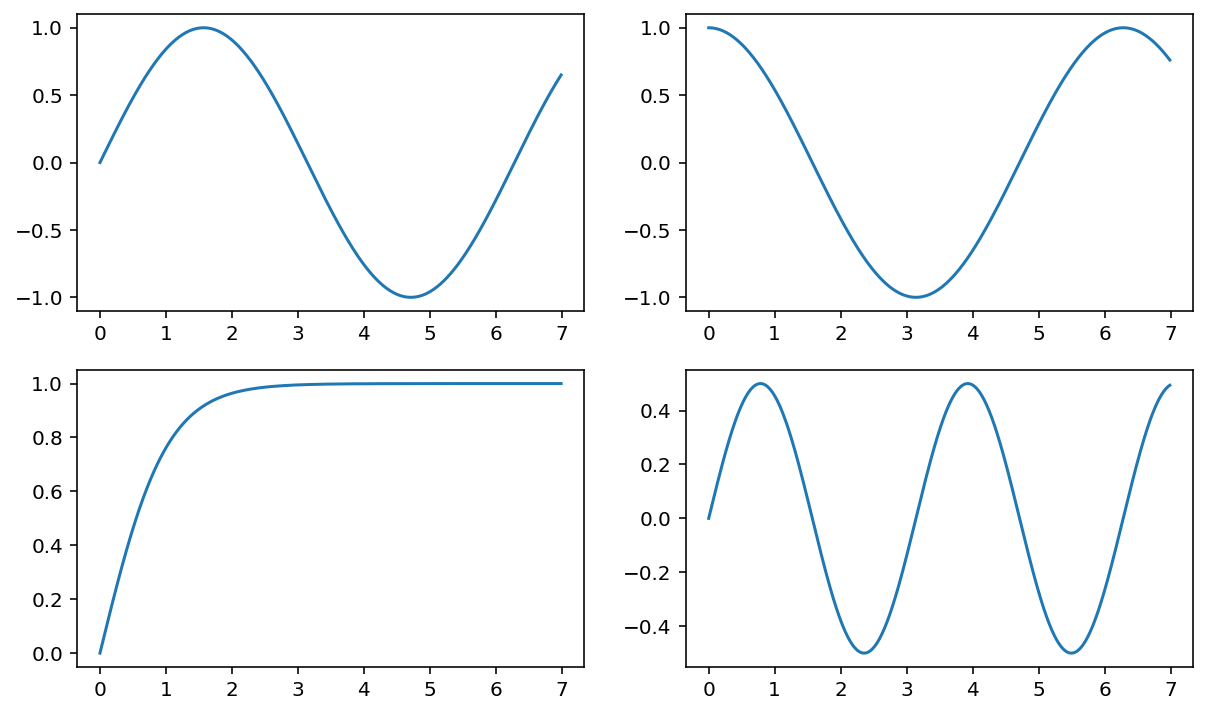

In [39]:
fig, axes = plt.subplots(2,2,figsize=(10,6))
axes.flat # 1차원으로
for i,ax in enumerate(axes.flat):
    ax.plot(x,func_list[i](x))

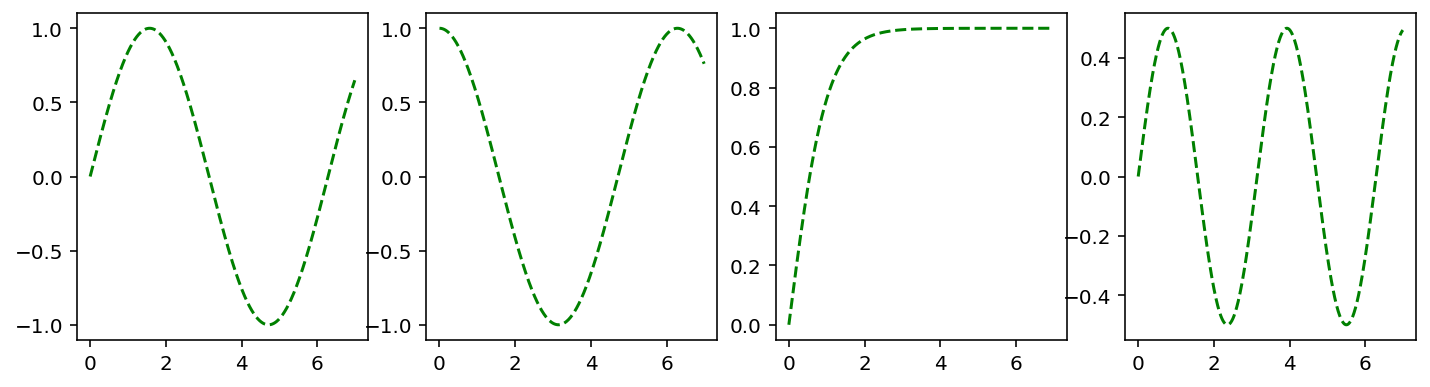

In [42]:
fig, axes = plt.subplots(ncols=4,figsize=(12,3))
for i,ax in enumerate(axes):
    ax.plot(x,func_list[i](x), 'g--')

## 다양한 그래프 그리기

In [43]:
np.random.randn(4,10) #4행 10열 난수

array([[ 0.81582094,  0.36326704, -0.32748742, -1.02582988, -0.74806376,
         0.14300594, -0.40381786, -0.22232697,  0.37233079,  1.53535895],
       [-0.12040212, -0.21475727, -0.41127462,  0.32426978, -0.34255937,
        -0.01972456, -0.34876187, -1.17516828, -0.16889538, -0.94811093],
       [ 0.99324219, -1.02851976, -1.97762507,  1.64234147, -0.32066332,
         1.04912304, -1.7128697 ,  0.63257887, -1.14887849, -1.07052688],
       [-1.09756579,  0.187175  , -0.11373498,  0.06456518, -0.30913096,
        -0.70238441,  0.70090573,  0.62451832, -0.41993547,  1.35702648]])

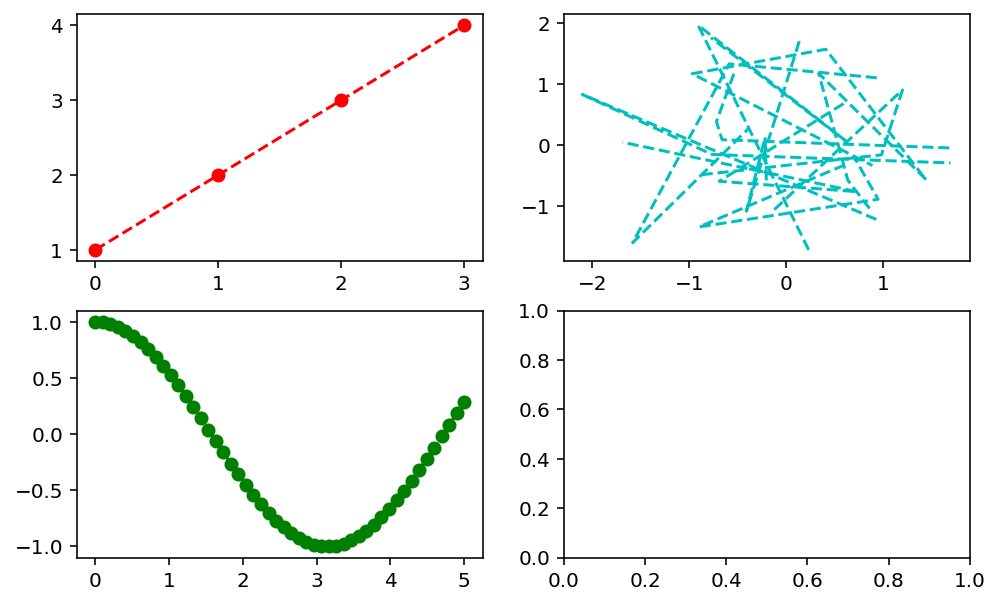

In [50]:
fig, axes = plt.subplots(2,2,figsize=(8,5))
axes[0,0].plot([1,2,3,4], 'ro--')
axes[0,1].plot(np.random.randn(4,10),np.random.randn(4,10), 'c--')
axes[1,0].plot(np.linspace(0,5), np.cos(np.linspace(0,5)), 'go--')
plt.show()

- pandas.Dataframe.plot()
    - plot(x=None,y=None,kind='line',figsize=None,title=None,grid=None,xlim,...)

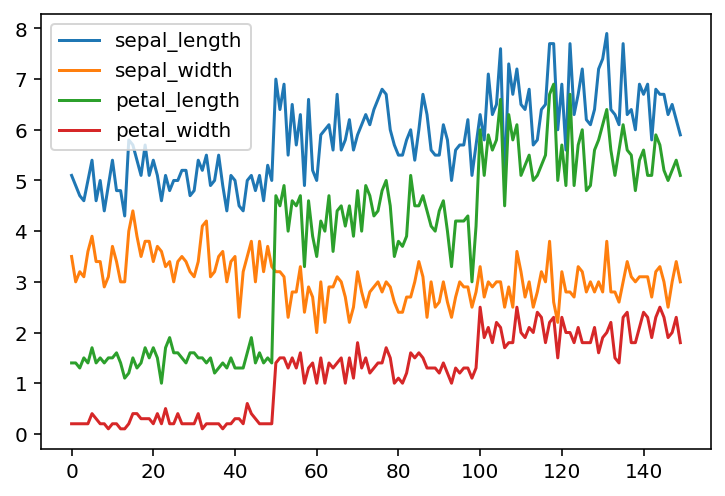

In [3]:
import seaborn as sns
iris = sns.load_dataset("iris")
iris.plot()
plt.show()

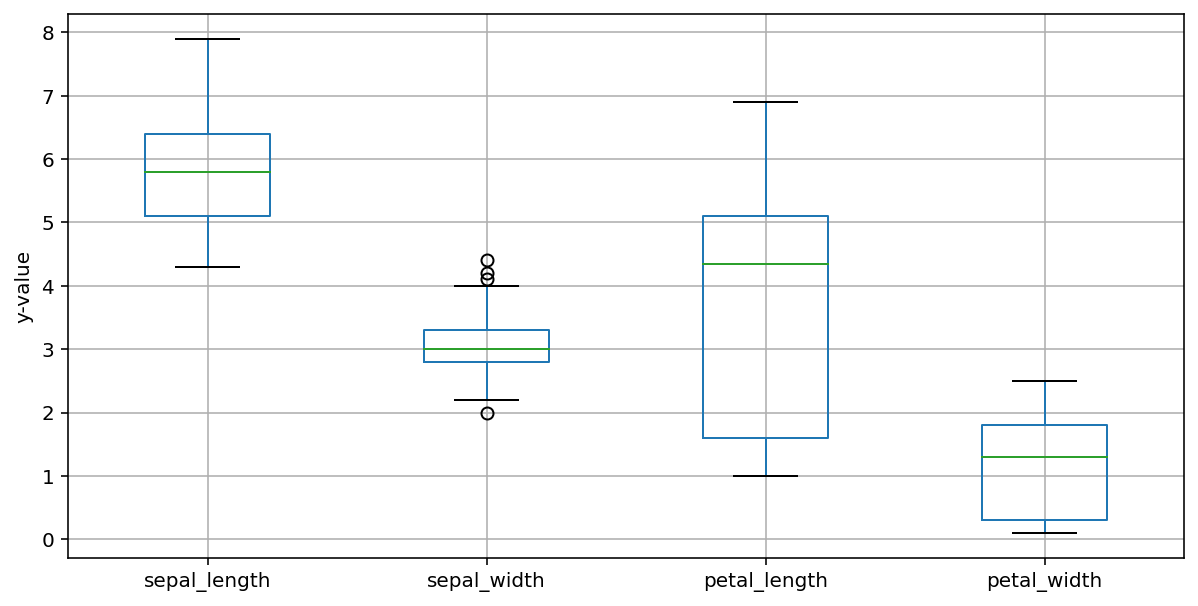

In [54]:
iris.plot(kind='box', figsize=(10,5), ylabel='y-value', grid=True)
plt.show()

In [55]:
# iris에서 상관관계가 가장 높은 두 변수 > scatter
iris.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


<AxesSubplot:xlabel='petal_width', ylabel='petal_length'>

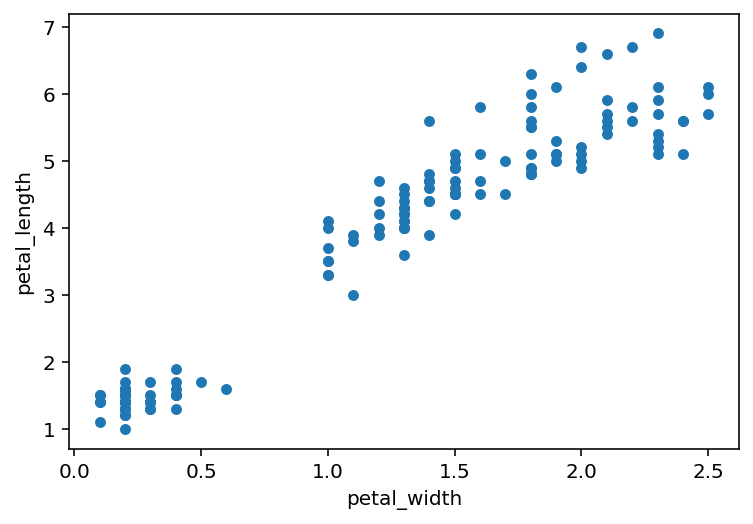

In [56]:
iris.plot(kind="scatter",x="petal_width",y="petal_length")

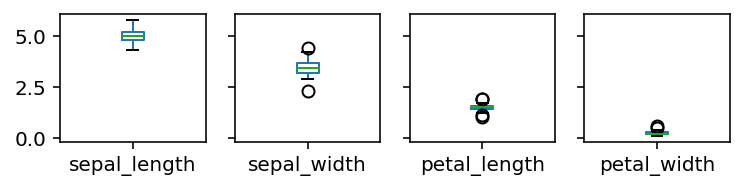

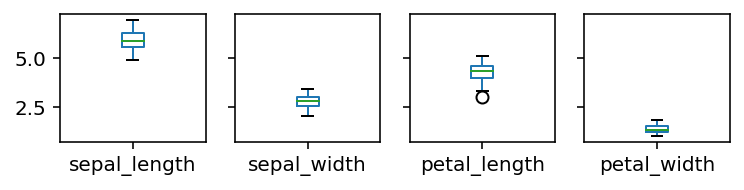

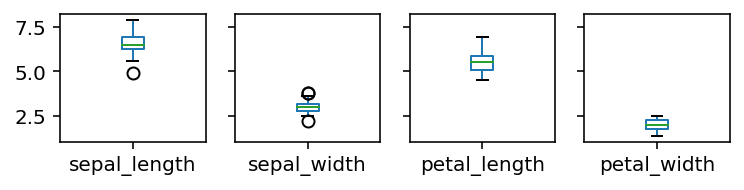

In [59]:
iris.groupby("species").plot(kind='box', subplots=True, sharey=True,layout=(3,4))
plt.show()

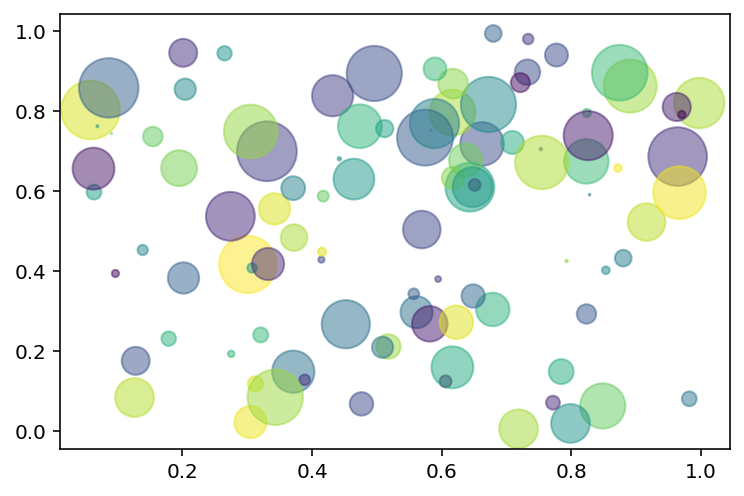

In [61]:
#pyplot.scatter
np.random.seed(2021)
N = 100
x = np.random.rand(N)
y = np.random.rand(N)
color = np.random.rand(N)
area = (np.random.rand(N)*30)**2
plt.scatter(x,y,s=area,c=color,alpha=0.5)

## 다양한 그래프 그리기 예
- fill(), fill_between(), bar(), axvline(), axhline()

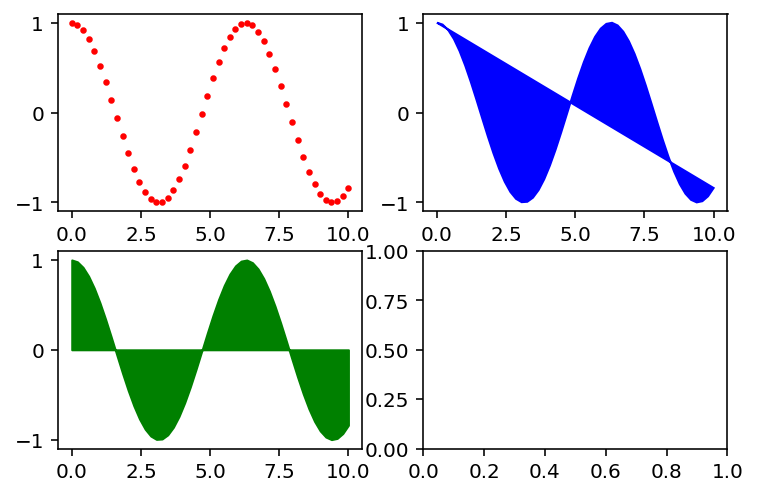

In [66]:
x = np.linspace(0,10)
y = np.cos(x)
fig, axes = plt.subplots(2,2)
axes[0,0].scatter(x,y,s=5,c='r',marker='o')
axes[0,1].fill(x,y,c='b')
axes[1,0].fill_between(x,y,color='g')

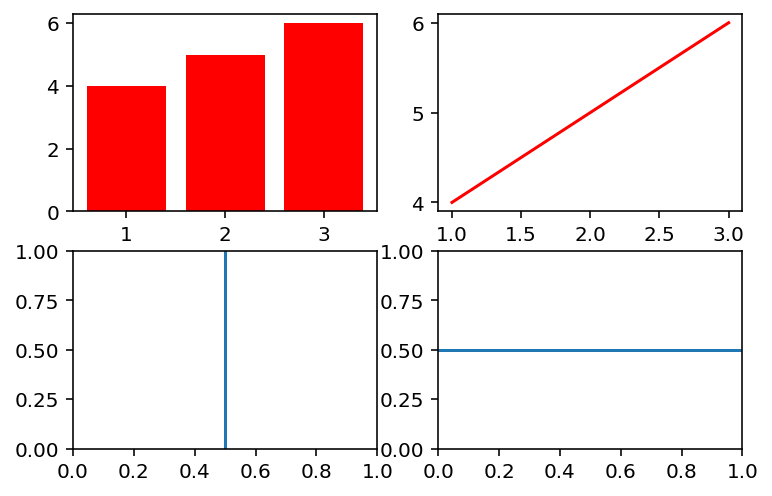

In [70]:
fig, axes = plt.subplots(2,2)
axes[0,0].bar([1,2,3],[4,5,6],color='r')
axes[0,1].plot([1,2,3],[4,5,6],color='r')
axes[1,0].axvline(0.5)
axes[1,1].axhline(0.5)

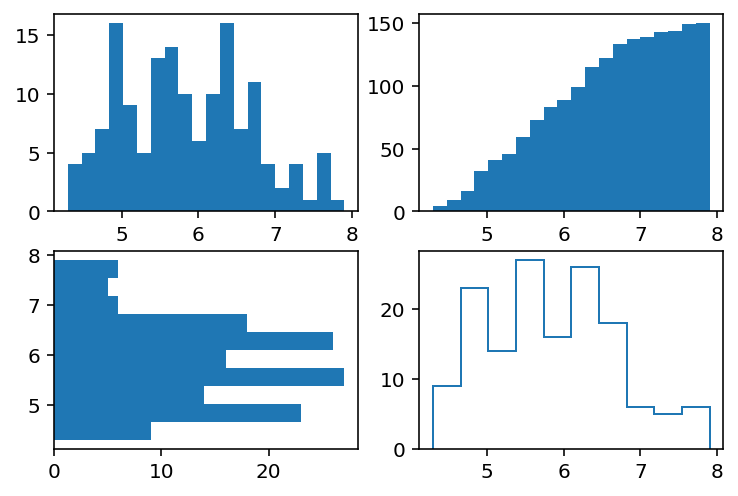

In [76]:
fig, axes = plt.subplots(2,2)
axes[0,0].hist(iris["sepal_length"], bins=20)
axes[0,1].hist(iris["sepal_length"], bins=20, cumulative=True)
axes[1,0].hist(iris["sepal_length"], bins=10, orientation='horizontal')
axes[1,1].hist(iris["sepal_length"], bins=10, histtype='step')
plt.show()

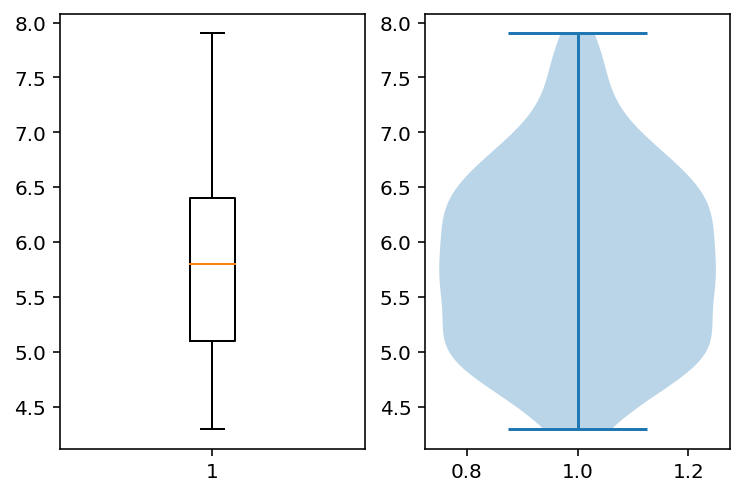

In [78]:
fig,axes = plt.subplots(1,2)
axes[0].boxplot(iris['sepal_length'])
axes[1].violinplot(iris['sepal_length'])
plt.show()

## 커스터마이징

**1)linestyle, linewidth**

In [5]:
x = np.linspace(0,10,100)
y = np.cos(x)

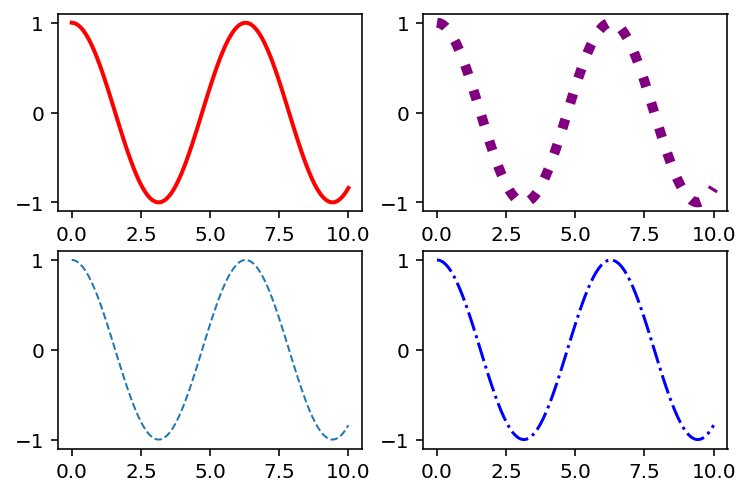

In [7]:
fig, axes = plt.subplots(2,2)
axes[0,0].plot(x, y, linewidth=2, color='r')
axes[0,1].plot(x, y, ls='dotted', linewidth=5, color='purple')
axes[1,0].plot(x, y, ls='--', linewidth=1)
axes[1,1].plot(x, y, ls='-.', c='b') # ls : linestyle

**2) text(), annotate()**

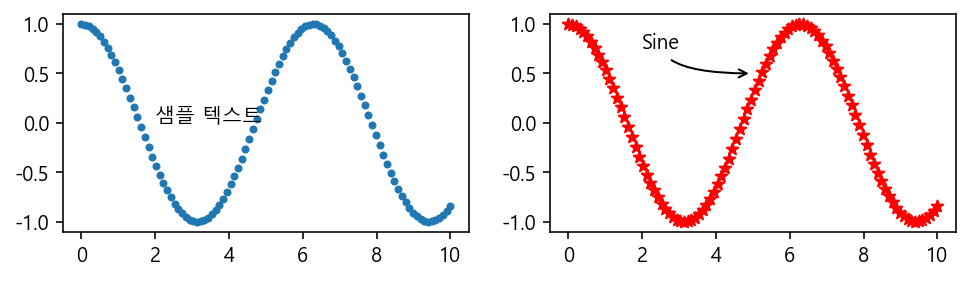

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(8,2))
axes[0].scatter(x, y, marker='.')
axes[0].text(2, 0, '샘플 텍스트', style='italic')
axes[1].scatter(x, y, marker='*',color='r')
axes[1].annotate('Sine', xytext=(2,0.75), # 글자가 있을 좌표 위치
                xy=(5,0.5), # 화살표가 가리킬 좌표 위치
                arrowprops = dict(arrowstyle='->',
                                  connectionstyle='angle3'))
plt.show()

In [10]:
# 한글 기본폰트 설정
plt.rc("font", family="Malgun Gothic") # 윈도우즈
# plt.rc("font", family="AppleGothic") # MAC
plt.rc("axes", unicode_minus=False) # 축

C:\Users\tjoeun\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49368 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\tjoeun\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54540 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\tjoeun\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 53581 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\tjoeun\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49828 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\tjoeun\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 53944 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\tjoeun\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 49368 missing 

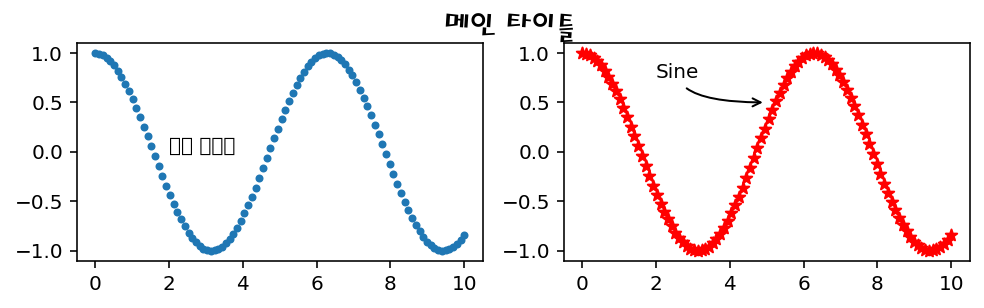

In [9]:
# 원하는 한글 폰트 지정
import matplotlib.font_manager as fm
font_path = 'C:/Windows/Fonts/HMKMMAG.TTF'
font_prop = fm.FontProperties(fname=font_path, size=15)
fig, axes = plt.subplots(1, 2, figsize=(8,2))
plt.suptitle("메인 타이틀", fontproperties=font_prop)

axes[0].scatter(x, y, marker='.')
axes[0].text(2, 0, '샘플 텍스트', style='italic')
axes[1].scatter(x, y, marker='*',color='r')
axes[1].annotate('Sine', xytext=(2,0.75), # 글자가 있을 좌표 위치
                xy=(5,0.5), # 화살표가 가리킬 좌표 위치
                arrowprops = dict(arrowstyle='->',
                                  connectionstyle='angle3'))
plt.show()

In [12]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.rc("font", family="Malgun Gothic") # 한글 윈도우즈
plt.rc("axes", unicode_minus=False) # 축
import warnings
warnings.filterwarnings(action='ignore')

In [13]:
#축과 눈금

[Text(0, 0, '-100'), Text(3, 0, '3'), Text(6, 0, '6개'), Text(9, 0, 'foo')]

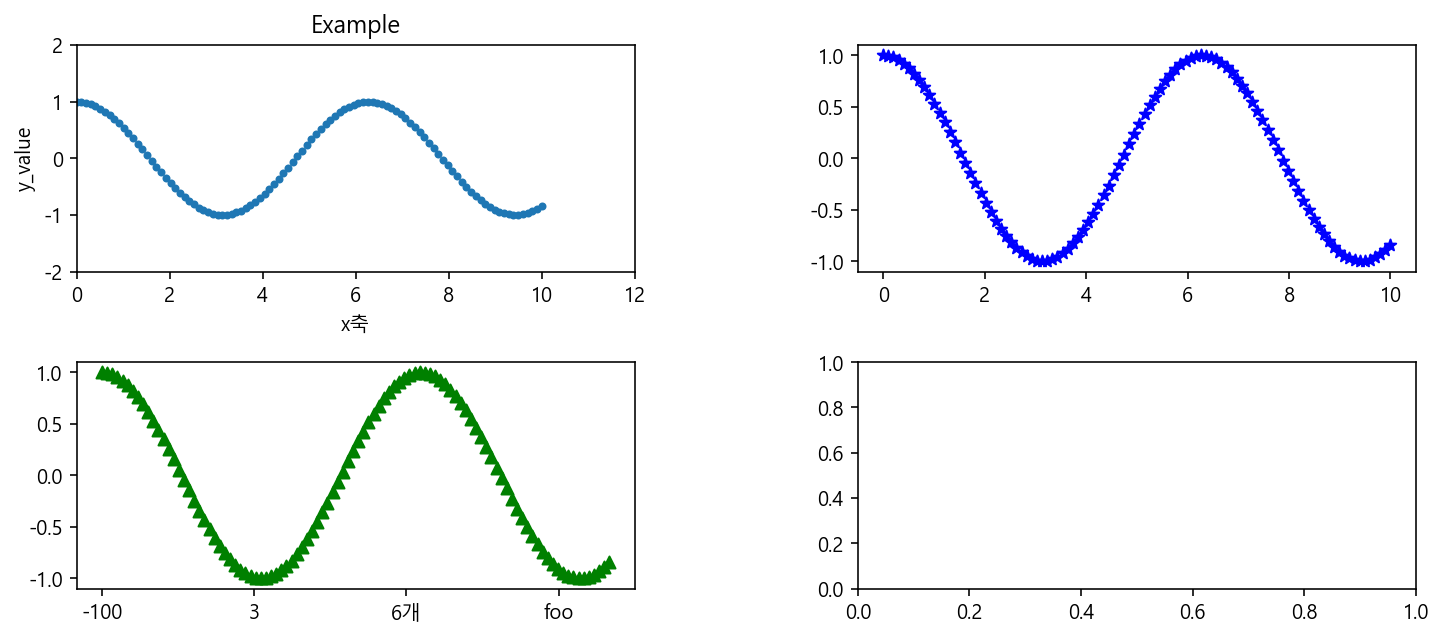

In [26]:
import numpy as np
x = np.linspace(0,10,100)
y = np.cos(x)
fig,axes = plt.subplots(2,2, figsize=(12,5))
plt.subplots_adjust(hspace=0.4, wspace=0.4) #여백
axes[0,0].scatter(x,y,marker='.')
axes[0,0].set(title='Example', ylabel='y_value', xlabel='x축', xlim=[0,12], ylim=[-2,2])
axes[0,1].scatter(x,y,marker='*',c='b')
#axes[0,1].set #설정별로 
axes[1,0].scatter(x,y,marker='^',c='g')
axes[1,0].set_xticks(range(0,11,3))
axes[1,0].set_xticklabels([-100,3,'6개','foo'])

In [ ]:
#축 공유

In [27]:
x = np.arange(0,10)
y1 = 0.5*x**2
y2 = -1*y1

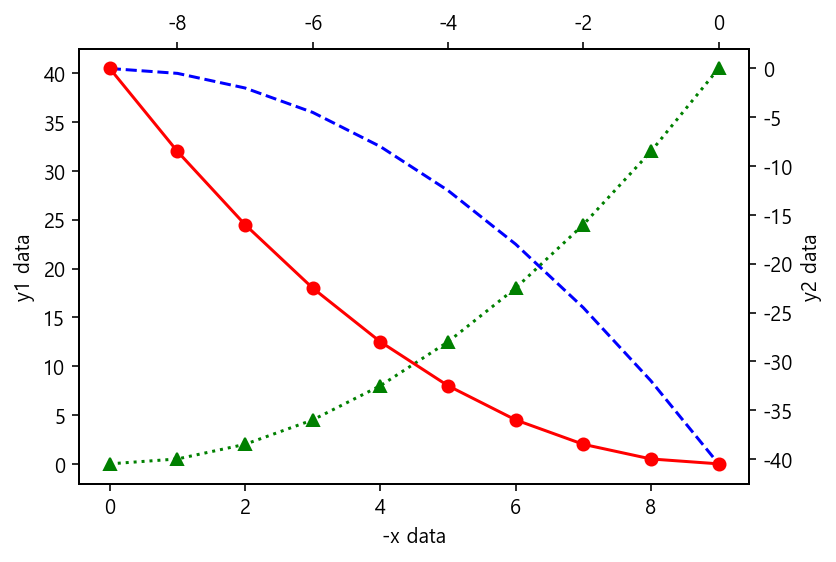

In [33]:
fig, ax1 = plt.subplots()
ax1.plot(x,y1,'g^:')
ax1.set(xlabel='X data', ylabel='y1 data')
ax2 = ax1.twinx()#x축 공유하는 ax2
ax2.plot(x,y2,'b--')
ax2.set(ylabel='y2 data')
ax3 = ax1.twiny()#y축 공유하는 ax3
ax3.plot(-x,y1,'ro-')
ax1.set(xlabel='-x data')
plt.show()

In [34]:
# 범례 표시

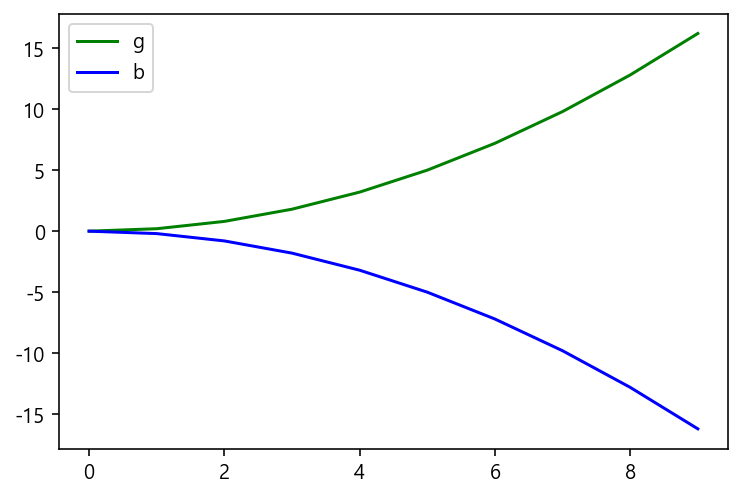

In [44]:
x = np.arange(0,10)
y = 0.2*x**2
fig, ax = plt.subplots()
ax.plot(x,y,'g', label='g')
ax.plot(x,-y,'b', label='b')
ax.legend()
# plt.legend(loc='center right')
plt.savefig("graph.png")# 저장